## Изучение общей информации файла с данными. 

Для чтения файла импортируем библиотеку pandas, также нам понадобятся библиотеки numpy, seaborn, matplotlib.pyplot, метод stats библиотеки scipy

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import  matplotlib.pyplot as plt


Изучим предоставленные данные.

In [2]:
try:
    data = pd.read_csv('D:\DataAnalitic\projects\projects_sb\games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')
display(data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Выведем информацию о датафрейме

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Посмотрим количество пропусков

In [4]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

В таблице 16715 строк и 11 столбцов.
Есть пропуски в столбцах:

* `Name` — название игры - 2 пропуска
* `Year_of_Release` — год выпуска - 269 пропусков
* `Genre` — жанр игры - 2 пропуска
* `Critic_Score` — оценка критиков (максимум 100) - 8578 пропусков (больше половины данных)
* `User_Score` — оценка пользователей (максимум 10) - 6701 пропуск
* `Rating` — рейтинг от организации ESRB - 6766 пропусков

Несоответствие типов данных:
* `Year_of_Release` — год выпуска - тип object - должен быть int
* `Critic_Score` — оценка критиков (максимум 100) - тип float64 должен быть тип int,так как оценка целое число от 0 до 100
* `User_Score` — оценка пользователей (максимум 10) - тип object - должен быть float


## Подготовка данных

Приведем название столбцов к нижнему регистру

In [5]:
data.rename(str.lower, axis='columns',inplace=True)

Приведем данные в названии жанра к нижнему регистру, чтобы проверить на дубликаты

In [6]:
data['genre'] = data['genre'].str.lower()

In [7]:
display(data.sample(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12400,TrackMania Turbo,XOne,2016.0,action,0.02,0.04,0.00,0.00,76.0,7.7,E
14394,Accel World: Ginyoku no Kakusei,PSP,2012.0,adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN
805,Rock Band,Wii,NaN,misc,1.33,0.56,0.00,0.20,80.0,6.3,T
7301,The Dukes of Hazzard: Return of the General Lee,PS2,2004.0,racing,0.11,0.08,0.00,0.03,52.0,6.8,E
6154,Syphon Filter: Dark Mirror,PS2,2007.0,shooter,0.14,0.11,0.00,0.04,70.0,7.8,T


Проверим, есть ли полные дубликаты

In [8]:
data[data.duplicated() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Поменяем тип данные в столбце `year_of_release`  на int

In [9]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


### Обработка пропусков

Изучим данные по каждому столбцу. Для этого напишем функцию discribe_column, которая будет выдавать описание данных , количество пропусков, рисовать график распределения данных для числовых значений (гистограмму и ящик с усами) и уникальные значения для значений типа 'object'.

In [11]:
def discribe_column(column):
    print('Тип данных:', column.dtypes)
    print('Количество пропусков:', column.isna().sum())
    if column.dtypes == 'object':
        print('Уникальные значения столбца', column.sort_values().unique())
    print('Описание данных:')
    print(column.describe())
    if column.dtypes == 'float64' or column.dtypes == 'int64':
        plt.figure(figsize=(9,5))
        column.plot.hist(grid=True)
        plt.xlabel(column.name)
        plt.title('Распределение')
      

Проверим пропуски в столбце `name`

In [12]:
display(data.loc[data['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


<div style='border:solid blue 2px; padding: 10px'>
Пропусков в названии игры 2, совпадают с пропусками в жанрах. Дата выпуска игр 1993 год, известны только данные по продажам, ни оценок пользователей, ни рейтинга игры нет, поэтому восстановить название игры не представляется возможным. Удалим эти строки

In [13]:
data= data.dropna(subset=['name'])

In [14]:
discribe_column(data['year_of_release'])

Тип данных: Int64
Количество пропусков: 269
Описание данных:
count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64


Посмотрим процентное соотношение пропусков в столбце `year_of_release`:

In [15]:
data['year_of_release'].isna().mean()*100

1.6095255190570215

<div style='border:solid blue 2px; padding: 10px'>
Дальше в анализе нужно выбрать топ-платформ по продажам за все годы. Поэтому заменим год на заглушку (1900). При выявлении актуального периода мы сможем отфильтровать данные.

In [16]:
data['year_of_release'] = data['year_of_release'].fillna(1900)

Изменим тип значений данного столбца на int32

In [17]:
data['year_of_release'] = data['year_of_release'].astype('int32')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.5+ MB


Тип данных: float64
Количество пропусков: 8576
Описание данных:
count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64


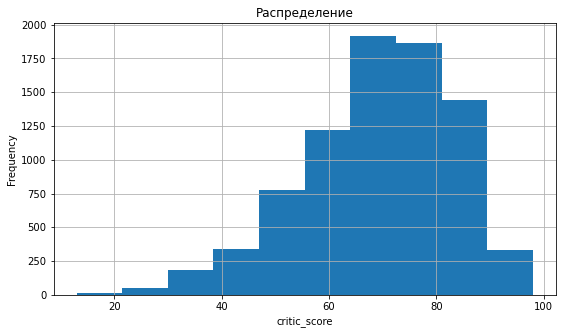

In [19]:
discribe_column(data['critic_score'])

рейтинг игр расположен в пределах от 13 до 98 баллов. Посмотрим как отличаются рейтинги игры в зависимости от платформы

In [20]:
data.pivot_table(index='name', columns ='platform', values='critic_score', aggfunc={'critic_score':'median'}).sample(15)

platform,3DS,DC,DS,GBA,GC,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
name,,,,,,,,,,,,,,,,,
Brothers: A Tale of Two Sons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,81.0
Ratchet: Deadlocked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F-14 Tomcat,NaN,NaN,NaN,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fantavision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WarTech: Senko no Ronde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN
Guitar Hero: Aerosmith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0,70.0,NaN,NaN,NaN,73.0,NaN,70.0,NaN,NaN
RACE On,NaN,NaN,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The Bureau: XCOM Declassified,NaN,NaN,NaN,NaN,NaN,66.0,NaN,NaN,69.0,NaN,NaN,NaN,NaN,NaN,68.0,NaN,NaN
Thor: God of Thunder,55.0,NaN,64.0,NaN,NaN,NaN,NaN,NaN,39.0,NaN,NaN,NaN,56.0,NaN,38.0,NaN,NaN


Многие игры выпускались не на всех платформах, рейтинги на разных платформах отличаются. Пустые значения заменить медианными значениями рейтинга игры на других платформах не получается.

Посмотрим, как распределены пропуски в оценках критиков по годам: 

In [21]:
data.query('critic_score.isna()',engine='python')['year_of_release'].value_counts(dropna=False).head()

2009    775
2010    755
2008    712
2011    636
2007    505
Name: year_of_release, dtype: int64

Больше всего пропусков в оценках критиков в играх, выпущенных с 2007 по 2011 годы

In [22]:
data.query('critic_score.isna()',engine='python')['platform'].value_counts(dropna=False).head()

DS     1434
PS      997
PS2     863
PSP     747
Wii     735
Name: platform, dtype: int64

По платформам пропусков много у DS, PS, PS2, PSP, Wii

In [23]:
data.query('critic_score.isna()',engine='python')['genre'].value_counts(dropna=False).to_frame().head()

,genre
action,1479
misc,1227
sports,1154
adventure,980
role-playing,761


По жанрам в пропусках в оценках критиков лидируют: action, misc, sports

In [24]:
data.query('critic_score.isna()',engine='python')['na_sales'].value_counts(dropna=False).to_frame().head()

,na_sales
0.00,3876
0.02,279
0.01,252
0.03,251
0.04,242


In [25]:
data.query('critic_score.isna()',engine='python')['jp_sales'].value_counts(dropna=False).to_frame().head()

,jp_sales
0.00,4470
0.02,523
0.03,381
0.01,374
0.04,268


In [26]:
data.query('critic_score.isna()',engine='python')['eu_sales'].value_counts(dropna=False).to_frame().head()

,eu_sales
0.00,4577
0.01,611
0.02,523
0.03,359
0.04,273


In [27]:
data.query('critic_score.isna() and na_sales== 0',engine='python')['eu_sales'].value_counts(dropna=False).to_frame().head()

,eu_sales
0.00,3306
0.01,132
0.02,126
0.03,73
0.04,42


Можно отметить, что отсутствие оценки критиков совпадает с отсутствием продаж по регионам. При чем отсутствие продаж в Европе в 3306 случаях совпадает с отсутствием продаж в Америке. 

<div style='border:solid blue 2px; padding: 10px'>
Судя по исследованию данных, пропуски в оценке критиков могут быть связаны с тем, что критики оценивают не все игры из какого-то жанра, и не все игры платформы. Также большинство пропусков в оценках у тех игр, которые не продаются в Европе и Америке либо в Японии.

Приведем столбец `critic_score` к типу int

In [28]:
data['critic_score'] = data['critic_score'].astype(float).astype('Int64')

Посмотрим данные в столбце `user_score`

In [29]:
discribe_column(data['user_score'])

Тип данных: object
Количество пропусков: 6699
Уникальные значения столбца ['0' '0.2' '0.3' '0.5' '0.6' '0.7' '0.9' '1' '1.1' '1.2' '1.3' '1.4' '1.5'
 '1.6' '1.7' '1.8' '1.9' '2' '2.1' '2.2' '2.3' '2.4' '2.5' '2.6' '2.7'
 '2.8' '2.9' '3' '3.1' '3.2' '3.3' '3.4' '3.5' '3.6' '3.7' '3.8' '3.9' '4'
 '4.1' '4.2' '4.3' '4.4' '4.5' '4.6' '4.7' '4.8' '4.9' '5' '5.1' '5.2'
 '5.3' '5.4' '5.5' '5.6' '5.7' '5.8' '5.9' '6' '6.1' '6.2' '6.3' '6.4'
 '6.5' '6.6' '6.7' '6.8' '6.9' '7' '7.1' '7.2' '7.3' '7.4' '7.5' '7.6'
 '7.7' '7.8' '7.9' '8' '8.1' '8.2' '8.3' '8.4' '8.5' '8.6' '8.7' '8.8'
 '8.9' '9' '9.1' '9.2' '9.3' '9.4' '9.5' '9.6' '9.7' 'tbd' nan]
Описание данных:
count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object


<div style='border:solid blue 2px; padding: 10px'>
    
Рейтинг пользователей от 0 до 9.7. В столбце имеется значение 'tbd', из-за которого нельзя поменять тип данных этого столбца на числовой. 
Значение 'tbd' в рейтингах означает, что [рейтинг еще не определен](https://en.wikipedia.org/wiki/To_be_announced), то есть значение рейтинга отсутствует. Поэтому заменим значение 'tbd' на значение 'Nan'

In [30]:
data['user_score'] = data['user_score'].replace('tbd',np.nan)

In [31]:
data['user_score'].isna().sum()

9123

Заменим тип данных на float

In [32]:
data['user_score'] = data['user_score'].astype('float32')

Посмотрим рейтинг игр на разных платформах

In [33]:
data['user_score'].isna().sum()

9123

In [34]:
data.pivot_table(index=['name'], columns ='platform',values='user_score').sample(20)

platform,3DS,DC,DS,GBA,GC,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
name,,,,,,,,,,,,,,,,,
Surfing H3O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rock Revolution,NaN,NaN,6.8,NaN,NaN,NaN,NaN,NaN,6.6,NaN,NaN,NaN,NaN,NaN,5.1,NaN,NaN
The Sims 4: City Living,NaN,NaN,NaN,NaN,NaN,5.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The Smurfs 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.6,5.4,NaN,NaN
Tao Feng: Fist of the Lotus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.5,NaN
The Dog Island,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,8.1,NaN,NaN,NaN,NaN
Chromehounds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
The Lord of the Rings: The Return of the King,NaN,NaN,NaN,8.2,8.5,NaN,NaN,8.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.1,NaN
Cabela's Big Game Hunter: Pro Hunts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.9,NaN,NaN,NaN,NaN,NaN,7.3,NaN,NaN


<div style='border:solid blue 2px; padding: 10px'>
    
Нельзя сказать, что рейтинги одной и той же игры на разных платформах близки, поэтому заменить отсутствующие значения на медианный рейтинг на других платформах нельзя.

Посмотрим, как распределены пропуски.

In [35]:
data.query('user_score.isna()',engine='python')['platform'].value_counts(dropna=False).head()

DS     1635
PS     1035
PS2     920
PSP     788
Wii     760
Name: platform, dtype: int64

По количеству пропусков в рейтинге пользователей лидируют те же платформы, что и по количеству пропусков в рейтинге критиков

Проверим как связаны пропуски в рейтинге пользователей и в рейтинге критиков

In [36]:
len(data.query('user_score.isna() and critic_score.isna()',engine='python'))

8003

<div style='border:solid blue 2px; padding: 10px'>
    
В большинстве случаях (8003 из 9123 для user_score и 8003 из 8576 для critic_score) отсутствие данных по рейтингу критиков совпадает с отсутствием рейтинга пользователей.

Посмотрим на распеределение рейтинга  ESRB

In [37]:
discribe_column(data['rating'])

Тип данных: object
Количество пропусков: 6764
Уникальные значения столбца ['AO' 'E' 'E10+' 'EC' 'K-A' 'M' 'RP' 'T' nan]
Описание данных:
count     9949
unique       8
top          E
freq      3990
Name: rating, dtype: object


Самый часто встречающийся рейтинг - 'Е' ('для всех')

количество строк с отсутствием рейтингов и нуливыми продажами в Европе или Америке

In [38]:
len(data.query('rating.isna() and (na_sales==0 or eu_sales==0) and critic_score.isna()'))

4138

<div style='border:solid blue 2px; padding: 10px'>
    
Отсутствие рейтинга  ESRB связано с отсутствием продаж в Европе и Америке, также нет и оценок критиков. Это логично, так как в Европе и Америке обязательным условием продажи игры в регионе является получение рейтинга ESRB.

Так как мы выяснили закономерность появления пропусков в рейтинге, заменим пропуски на значение no_rating

In [39]:
data['rating'] = data['rating'].fillna('no_rating')

In [40]:
data['rating'].unique()

array(['E', 'no_rating', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

### Добавление столбца с суммарными продажами

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [41]:
data['total_sales'] = data.loc[:,'na_sales':'other_sales'].sum(axis=1)

<div style='border:solid blue 2px; padding: 20px'>
    
<b> Вывод:</b>
* Заменили регистр на нижний в названиях столбцов, а также жанрах. Полные дубликаты не обнаружены. 
* Заменили отсутствующий год выхода игры на заглушку (1900).    
* Заменили тип данных в столбцах `year_of_release` на int, `critic_score` на int, в `user_score`на float, также в столбце  `user_score` заменили значение 'tbd' на 'nan',чтобы возможно было проводить математические операции над данными и строить графики.
* Заменили пропуски в столбце `rating` на  no_rating, так как выяснили, что отсутствие рейтинга связано с отсутствием продаж игр в Европе и Америке.  
* Добавили столбец `total_sales` с суммарными продажами во всех регионах.  

In [42]:
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float32
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: Int64(1), float32(1), float64(5), int32(1), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006

## Исследовательский анализ данных

### Исследование изменения количества выпускаемых игр

Построим график изменения количества выпускаемых игр по годам

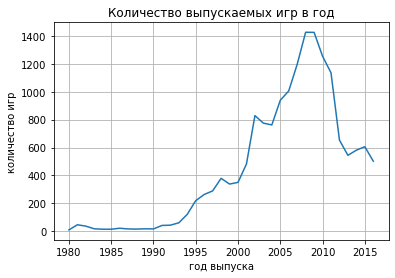

In [43]:
data.query('year_of_release>1900').groupby('year_of_release')['name'].count().plot(xlabel='год выпуска', ylabel='количество игр', grid=True)
plt.title('Количество выпускаемых игр в год');

<div style='border:solid blue 2px; padding: 10px'>
    
Из графика видно, что пик выпуска игр пришелся на 2008 год. С 1990 по 2008 произошел резкий скачок в количестве выпускаемых игр. После 2008 года пошел спад выпуска игр, что связано с экономическим кризисом 2008 года и переориентированием рынка на онлайн и мобильные игры.

### Исследование изменения продаж по платформам

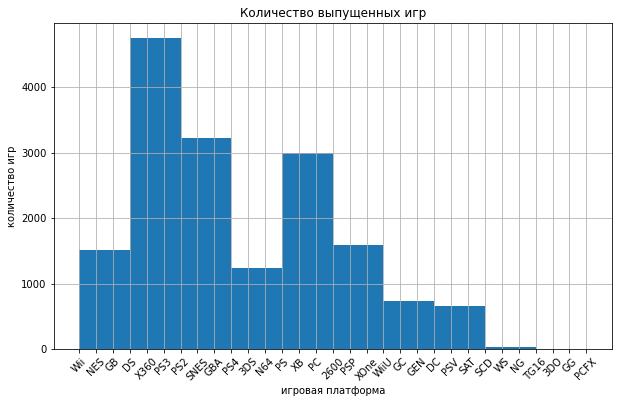

In [44]:
data['platform'].hist(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel("игровая платформа")
plt.ylabel("количество игр")

plt.title('Количество выпущенных игр');

Больше всего игр выпускалось на платформах DS, X360,PS3-больше 4500,PS2, SNES,GBA- больше 3000

Посмотрим, как менялись продажи по платформам. Выберем 10 платформ с наибольшими суммарными продажами и построим распределение по годам.

Найдем топ-10 платформ по объемам продаж за все время

In [45]:
top_10_platforms= data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index().head(10)
display(top_10_platforms)

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


Разница в объемах продаж у 6-го и 5-го места больше, чем в 2 раза (в 2.3). 

In [46]:
# таблица по играм, выпущенным на платформах из топ-10
df_top_platforms= data.merge(top_10_platforms, on='platform', how='inner')
df_top_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales_x,total_sales_y
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54,907.51
1,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52,907.51
2,Wii Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77,907.51
3,Wii Play,Wii,2006,misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91,907.51
4,New Super Mario Bros. Wii,Wii,2009,platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32,907.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12814,Hyakki Yagyou Kaidan Romance,PSP,2012,action,0.00,0.00,0.01,0.00,<NA>,NaN,no_rating,0.01,294.05
12815,XI Coliseum,PSP,2006,puzzle,0.00,0.00,0.01,0.00,<NA>,NaN,no_rating,0.01,294.05
12816,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013,adventure,0.00,0.00,0.01,0.00,<NA>,NaN,no_rating,0.01,294.05
12817,Neo Angelique Special,PSP,2008,adventure,0.00,0.00,0.01,0.00,<NA>,NaN,no_rating,0.01,294.05


Поссчитаем продажи по годам для каждой платформы из топ-10

In [47]:
top_platforms_sales=df_top_platforms.query('year_of_release>1900').groupby(['platform','year_of_release']).agg(total_sales=('total_sales_x', 'sum')).reset_index()


Построим графики продаж для каждой платформы 

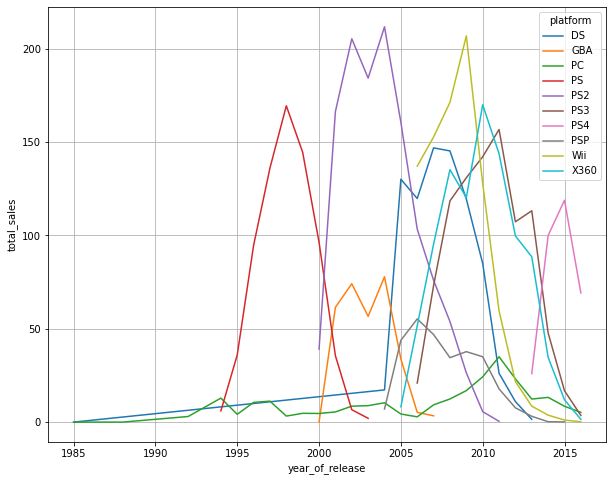

In [48]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x='year_of_release',
            y='total_sales',
            hue="platform",
            data=top_platforms_sales    
            )
plt.grid()
plt.show()

На графике виден странный зигзаг у платформы DS. Выпущена платформа в 2004 году. Проверим, много ли игр с ошибкой

In [49]:
df_top_platforms.query('year_of_release==1985 & platform == "DS"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales_x,total_sales_y
3362,Strongest Tokyo University Shogi DS,DS,1985,action,0.0,0.0,0.02,0.0,<NA>,NaN,no_rating,0.02,806.12


Strongest Tokyo University Shogi DS была выпущена в [2007 году](https://gamefaqs.gamespot.com/ds/937837-saikyou-toudai-shogi-ds/playing) 

Исправим ошибку

In [50]:
df_top_platforms.loc[df_top_platforms['name'] =="Strongest Tokyo University Shogi DS",'year_of_release']=2007

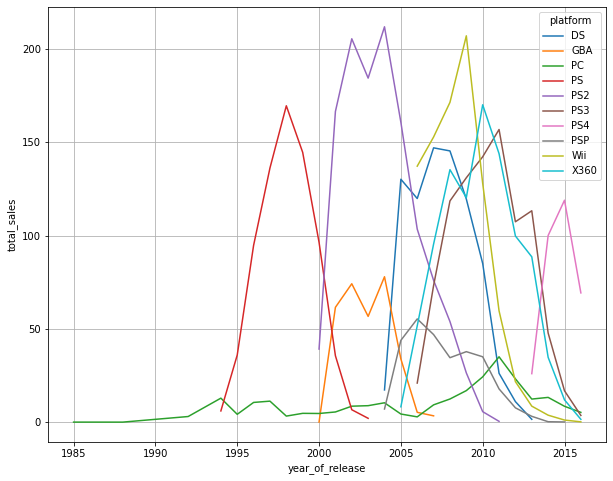

In [51]:
top_platforms_sales=df_top_platforms.query('year_of_release>1900').groupby(['platform','year_of_release']).agg(total_sales=('total_sales_x', 'sum')).reset_index()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x='year_of_release',
            y='total_sales',
            hue="platform",
            data=top_platforms_sales    
            )
plt.grid()
plt.show()

Тенденция прослеживается. Но построим еще тепловую карту продаж по годам.

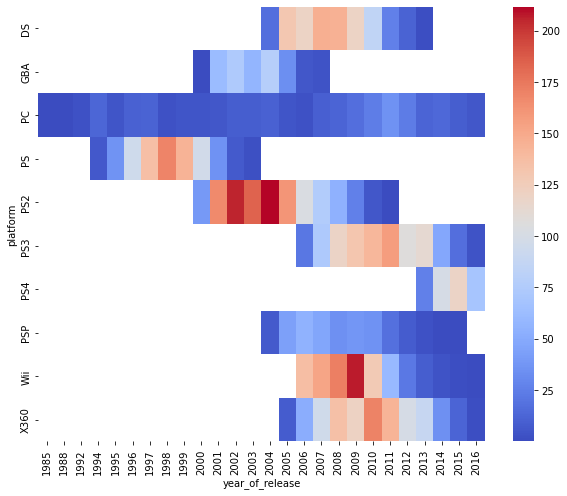

In [52]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_top_platforms.query('year_of_release>1900').pivot_table(index='platform', columns='year_of_release', values='total_sales_x', aggfunc='sum'),cmap= 'coolwarm');

<div style='border:solid blue 2px; padding: 20px'>
    
<b> Вывод:</b>   
Судя по графику платформы "живут" 10-12 лет, PC (существует больше 30 лет, но продажи у нее стабильно низкие), а также PS4 (на 2016 год она "жила" только 4 года). Пик продаж наступает через 3-7 лет после выхода на рынок. 

### Поиск потенциально прибыльных платформ

Для построения прогноза на 2017 год, нужно исследовать данные, начиная с 2011 года, так как пик продаж самое познее наступал на седьмой год после выхода игр (чтобы 2017-й стал 7-м, выход платформы должен прийтись на 2011-й). 

Найдем первый год выхода игры на платформе (должен совпадать с появлением самой платформы), пропуски (год = 1900) отбросим

In [53]:
t = data.query('year_of_release >1900').groupby('platform').agg(min_year_release=('year_of_release', 'min')).reset_index()

In [54]:
t.sample(10)

,platform,min_year_release
30,XOne,2013
6,GBA,2000
2,3DS,2011
22,SCD,1993
19,PSP,2004
18,PS4,2013
16,PS2,2000
7,GC,2001
11,NES,1983
14,PCFX,1996


Отберем платформы, появившиеся после 2010 года

In [55]:
data_release_2011_2016 = data.query('year_of_release >1900').merge(t,on='platform', how='inner').query('min_year_release > 2010')


Посмотрим, какие это платформы

In [56]:
data_release_2011_2016.platform.unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PSV'], dtype=object)

Построим линейный график и heatmap

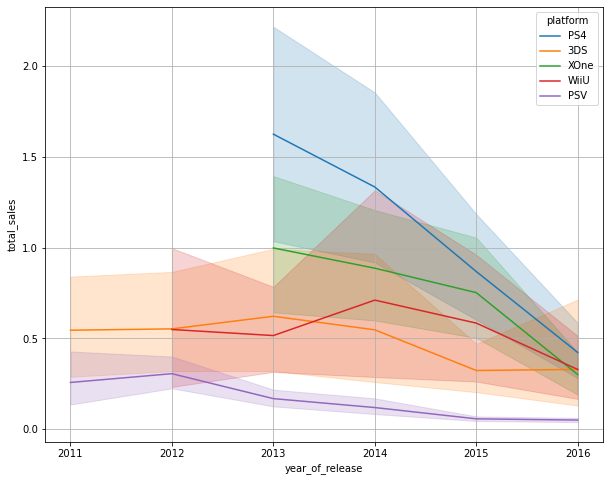

In [57]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x='year_of_release',
            y='total_sales',
            hue="platform",
            data=data_release_2011_2016   
            )
plt.grid()
plt.show()

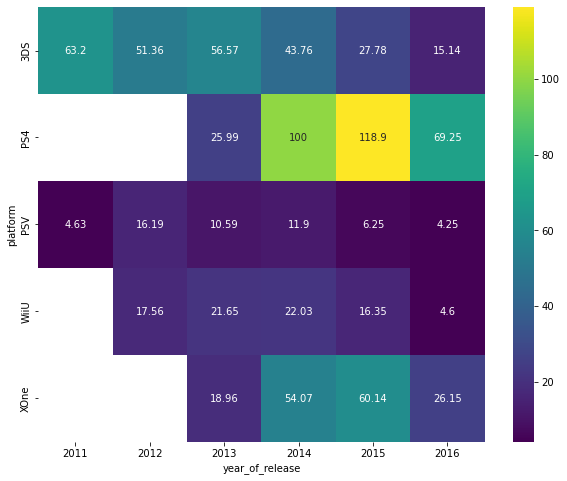

In [58]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data_release_2011_2016.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum'),annot=True,cmap= 'viridis',fmt='g');

По графикам видно, что из 5ти платформ, выпущенных после 2011 года (PS4, XOne, WiiU, PSV,3DS) у ps4 и xone в 2014-2015 годах были пики продаж, но пики небольшие (у топ 10 платформ пик продаж был в 10 раз больше, чем продажи в первый год). Продажи же на платформах PSV и WiiU дали увеличение на 2-ой год, но стали падать практически через 2 года после релиза. Так продажи WiiU упали в 3.8 раз к 2016му году, а PSV к 2016му вернулись на уровень 2011 года.Продажи 3DS дали максимум в 2011 года, а потом стали падать 

<div style='border:solid blue 2px; padding: 20px'>
    
<b> Вывод:</b>
* Потенциально прибыльными являются платформы PS4 и XONE. Можно отметить, что PS4 попала в топ-платформ по продажам за всю историю наблюдений, хотя ее жизненный цикл только 4 года.

<div style='border:solid blue 2px; padding: 10px'>
    
В такой динамично меняющейся индустрии, как компьютерные игры лучше взять период для исследования короче, чем 7 лет. Возьмем период 2012-2016гг (4 полных года и 2016й неполный). Можно отметить, что 5 лет - примеро половина жизненного цикла платформы.

Выделим данные в отдельный датасет и будем работать в дальнейшем с ним

In [59]:
data_current_period = data.query('year_of_release >2011')

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

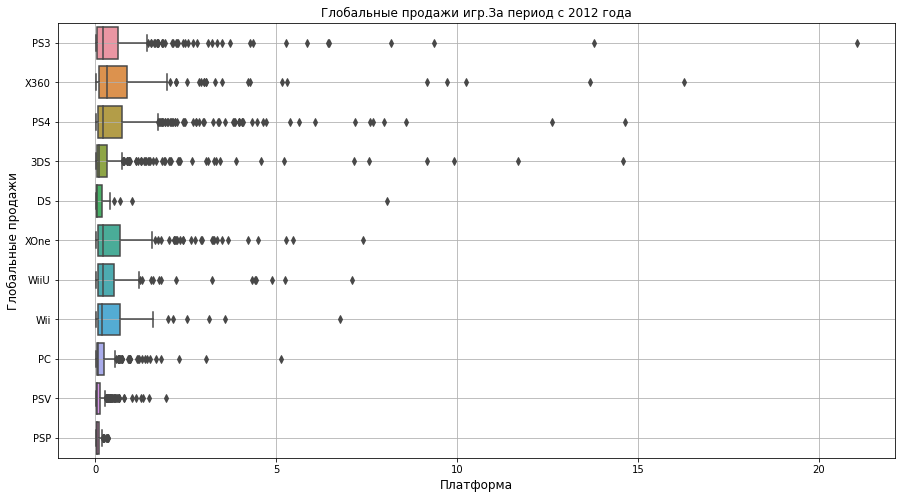

In [60]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.title('Глобальные продажи игр.За период с 2012 года')       
sns.boxplot(x='total_sales',
            y='platform',
            data=data_current_period
            )
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.grid();       

 К сожалению, на диаграмме размаха видны только выбросы, и совсем не видны медиана и 75% квантиль. Обрежем ось х. чтобы посмотреть подробнее.

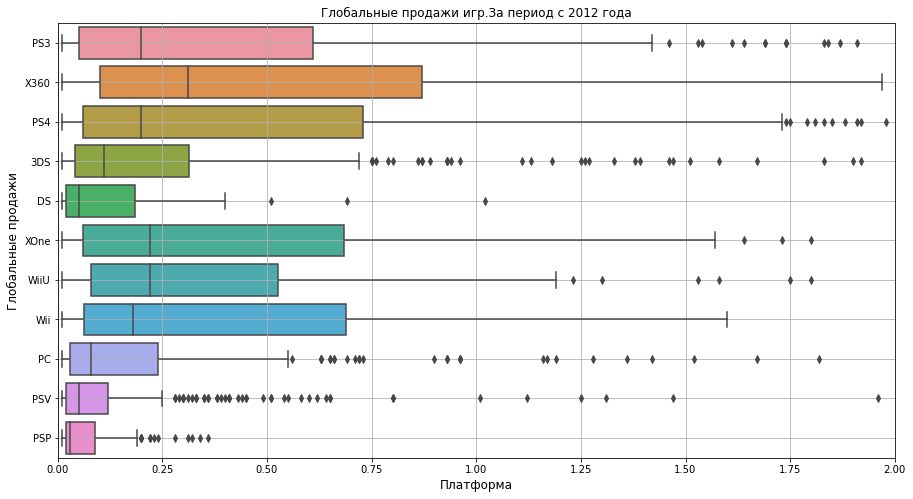

In [61]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.title('Глобальные продажи игр.За период с 2012 года')       
sns.boxplot(x='total_sales',
            y='platform',
            data=data_current_period
            )
plt.xlim(0,2)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.grid();       

In [62]:
data_current_period.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
DS,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06
PC,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
PS3,493.0,0.585781,1.462855,0.01,0.0500,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.03,0.0900,0.36
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.05,0.1200,1.96
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09


<div style='border:solid blue 2px; padding: 10px'>
    
Выбросов у платформ очень много и они сильно отличаются, так PS3 имеет глобальные продажи свыше 21 млн, тогда как продажи PS2, PSP, PSV за актуальный период не превышали и 2 млн.  
    
Это можно объяснить и разным временем "жизни", и тем, что одни платформы свои пики еще не достигли, а продажи других были прекращены (например,игры на PS2 после 2011 года не выходили). Но медианное значение всех платформ не превышает 0.3 млн.

### Влияние оценок критиков и пользователей на глобальные продажи платформ

Возьмем самую популярную платформу за всю историю наблюдений - ps2. Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

In [63]:
data_ps2 = data.loc[data['platform']=='PS2', ['critic_score','user_score','total_sales']]

In [64]:
data_ps2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2161 entries, 17 to 16709
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   critic_score  1298 non-null   Int64  
 1   user_score    1241 non-null   float32
 2   total_sales   2161 non-null   float64
dtypes: Int64(1), float32(1), float64(1)
memory usage: 61.2 KB


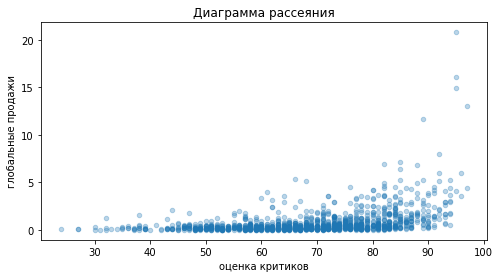

In [65]:
data_ps2.plot(x='critic_score', y = 'total_sales', kind='scatter',xlabel='оценка критиков', ylabel='глобальные продажи',alpha =0.3,figsize=(8,4) );
plt.title('Диаграмма рассеяния');

In [66]:
print('Коэффициент корреляции:', data_ps2['total_sales'].corr(data_ps2['critic_score'].astype('float32')))

Коэффициент корреляции: 0.3954345494545488


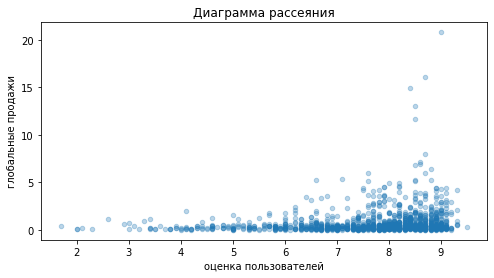

In [67]:
data_ps2.plot(x='user_score', y = 'total_sales', kind='scatter',xlabel='оценка пользователей', ylabel='глобальные продажи',alpha =0.3, figsize=(8,4));
plt.title('Диаграмма рассеяния');

In [68]:
print('Коэффициент корреляции:', data_ps2['total_sales'].corr(data_ps2['user_score']))

Коэффициент корреляции: 0.17286550177990218


Влияние оценок критиков на глобальные продажи в 2 раза выше, чем влияние оценок пользователей. 

Проверим выводы с продажами игр на других платформах,
для этого напишем функцию, которая будет выводить графики и описание корреляции.
для оценки корреляции восспользуемся шкалой Чеддока:
</font>
![image.png](attachment:image.png)

Проверим выводы с продажами игр на других платформах,
для этого напишем функцию, которая будет выводить графики и описание корреляции.
для оценки корреляции восспользуемся шкалой Чеддока:</font>
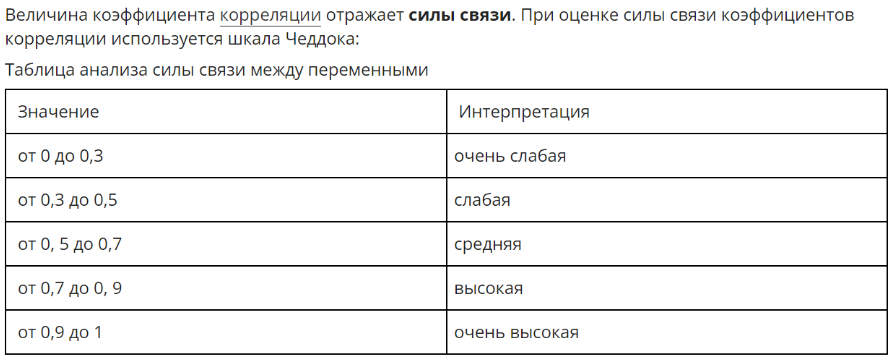

In [69]:
# функция для оценки корреляции
def cor_describe(corr):
    if abs(corr) < 0.3:
        return 'очень слабая'
    if abs(corr) <= 0.5:
        return 'слабая'
    if abs(corr) <= 0.7:
        return 'средняя'
    if abs(corr) <= 0.9:
        return 'высокая'
    if 0.9 < abs(corr):
        return 'очень высокая'
    return 'данные отсутствуют'

In [70]:
def platform_cor(name):
    user_cor = data_current_period.loc[data_current_period['platform']==name]['total_sales'].corr(data_current_period.loc[data_current_period['platform']==name]['user_score'])
    critic_cor = data_current_period.loc[data_current_period['platform']==name]['total_sales'].corr(data_current_period.loc[data_current_period['platform']==name]['critic_score'].astype('float32'))
    if np.isnan(user_cor) and np.isnan(critic_cor):
        print(f'Данных по платформе {name} недостаточно для оценки влияния оценок критиков и пользователей на продажи платформы ')
    else:
        g = sns.PairGrid(data=data_current_period.loc[data_current_period['platform']==name],
                 x_vars=['critic_score', 'user_score'],
                 y_vars=['total_sales'],            
                 height=4)

        g.map(sns.scatterplot);

# Устанавливаем общий заголовок
        g.fig.suptitle(f'Зависимость продаж от оценок критиков (слева) и пользователей (справа) \n платформы {name}',
               y = 1.1,
               fontsize = 15)
        plt.show()
        print(f'Корреляция продаж платформы {name} с оценками критиков:', cor_describe(critic_cor), critic_cor )   
        print(f'Корреляция продаж платформы {name} с оценками пользователями:', cor_describe(user_cor), user_cor)
        print()

In [71]:
#platform_cor('PS3')

Данные за актуальный период:


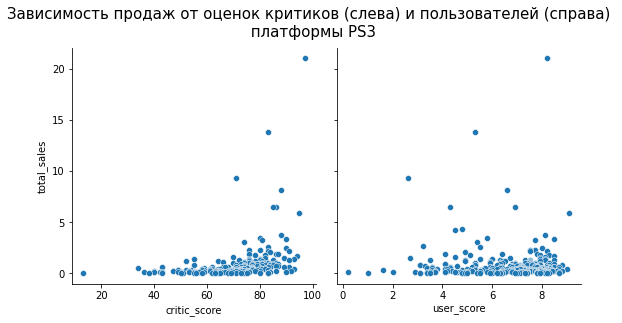

Корреляция продаж платформы PS3 с оценками критиков: слабая 0.33149725926295903
Корреляция продаж платформы PS3 с оценками пользователями: очень слабая -0.005143521263447891



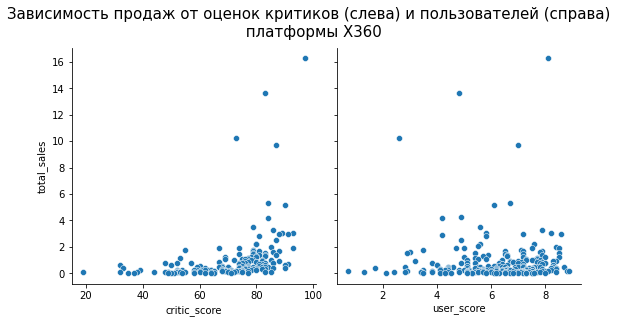

Корреляция продаж платформы X360 с оценками критиков: слабая 0.36057348885073387
Корреляция продаж платформы X360 с оценками пользователями: очень слабая 0.0061639888024794635



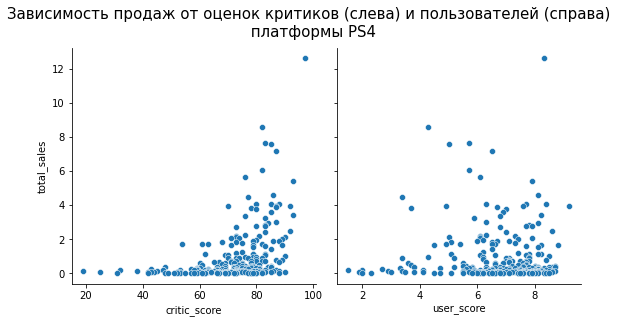

Корреляция продаж платформы PS4 с оценками критиков: слабая 0.40656790206178145
Корреляция продаж платформы PS4 с оценками пользователями: очень слабая -0.03195710900518831



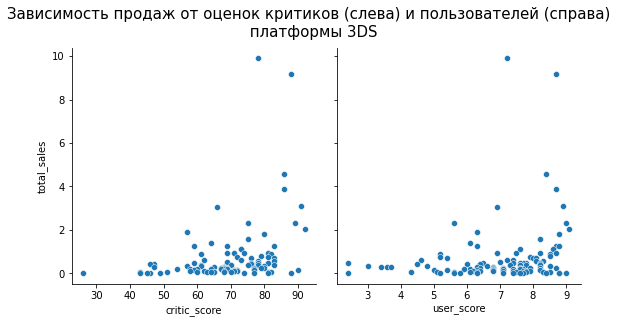

Корреляция продаж платформы 3DS с оценками критиков: слабая 0.3208028695360786
Корреляция продаж платформы 3DS с оценками пользователями: очень слабая 0.19758261153521028



C:\Users\Margarita\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Margarita\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


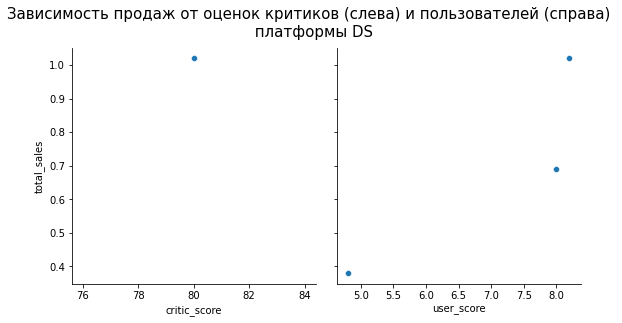

Корреляция продаж платформы DS с оценками критиков: данные отсутствуют nan
Корреляция продаж платформы DS с оценками пользователями: высокая 0.8827087062516973



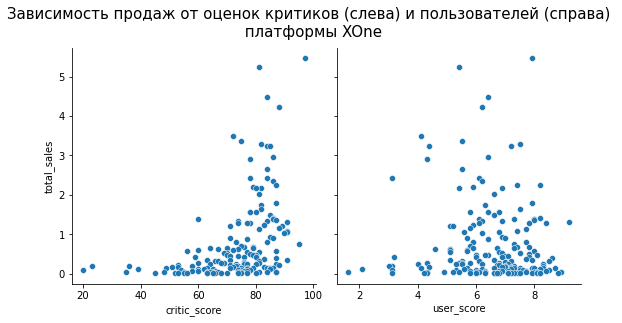

Корреляция продаж платформы XOne с оценками критиков: слабая 0.4169983280084016
Корреляция продаж платформы XOne с оценками пользователями: очень слабая -0.06892505319711217



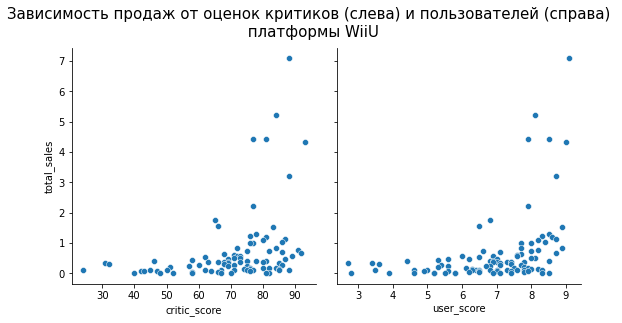

Корреляция продаж платформы WiiU с оценками критиков: слабая 0.34837976012017496
Корреляция продаж платформы WiiU с оценками пользователями: слабая 0.40021903777106105



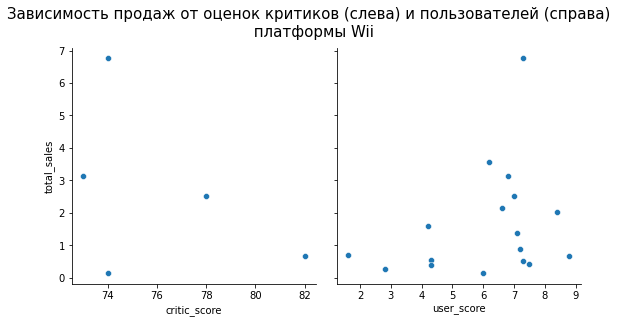

Корреляция продаж платформы Wii с оценками критиков: слабая -0.4243413011077496
Корреляция продаж платформы Wii с оценками пользователями: очень слабая 0.2961968034146174



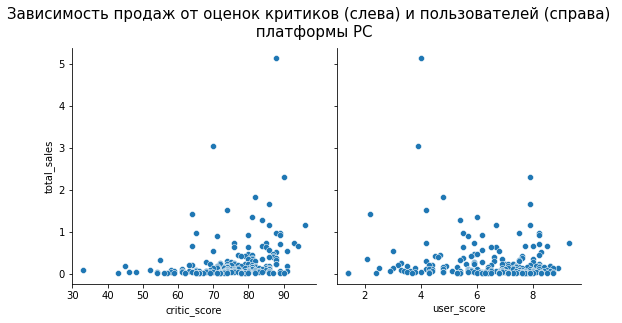

Корреляция продаж платформы PC с оценками критиков: очень слабая 0.23724324311567896
Корреляция продаж платформы PC с оценками пользователями: очень слабая -0.12186748061872181



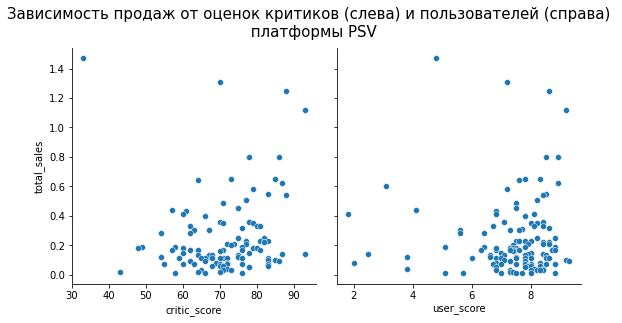

Корреляция продаж платформы PSV с оценками критиков: очень слабая 0.0944878992931617
Корреляция продаж платформы PSV с оценками пользователями: очень слабая -0.0043394548982997405



C:\Users\Margarita\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Margarita\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


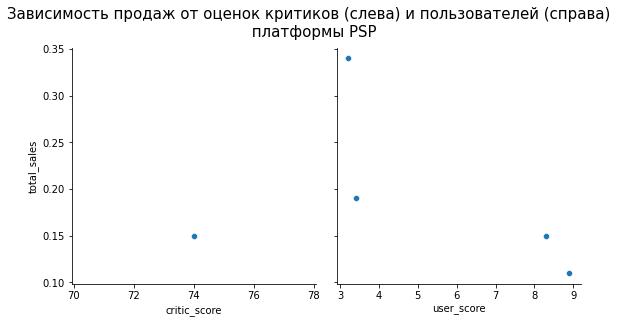

Корреляция продаж платформы PSP с оценками критиков: данные отсутствуют nan
Корреляция продаж платформы PSP с оценками пользователями: высокая -0.8023020589109723



In [72]:
print('Данные за актуальный период:')
for name in data_current_period['platform'].unique():
    platform_cor(name)


<div style='border:solid blue 2px; padding: 20px'>
    
<b> Вывод:</b>   
Выводы подтвердились для большинства платформ: между оценкой критиков и продажами пользователей имеется слабая (в диапазоне [0.3, 0.5) прямая зависимость (исключение платформы -DS, PCV, Wii - для которых и влияние оценки критиков также очень слабое), тогда как между оценкой пользователей и продажами линейная связь очень слабая. Исключение - платформа - WiiU, для которой линейная взаимосвязь продаж с оценкой пользователей слабая и даже выше, чем с оценками критиков. 

### Распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам. По продажам игр

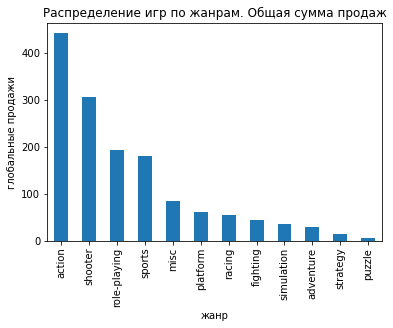

In [73]:
plt.title('Распределение игр по жанрам. Общая сумма продаж')   
data_current_period.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', xlabel='жанр',ylabel='глобальные продажи')
plt.show()

По общим продажам лидируют action и shooter. Посмотрим по медианным продажам, ведь на суммарные продажи влияет и количество игр, выпущенных в данном жанре, и отдельные успешные игры.

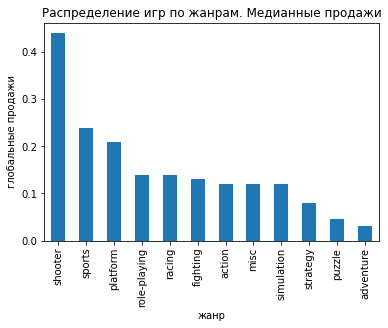

In [74]:
plt.title('Распределение игр по жанрам. Медианные продажи')   
data_current_period.groupby('genre')['total_sales'].median().sort_values(ascending=False).plot(kind='bar', xlabel='жанр',ylabel='глобальные продажи')
plt.show()

А вот по медианным продажам лидирует shooter, action съехали в серидину рейтинга

Посмотрим на общее распределение игр по жанрам. По количеству выпущенных игр

''

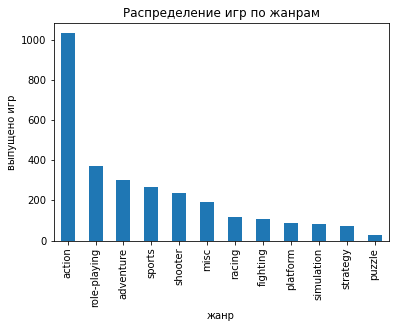

In [75]:
plt.title('Распределение игр по жанрам')   
data_current_period['genre'].value_counts().plot(kind='bar', xlabel='жанр',ylabel='выпущено игр')
;

Как и предполагалось, продажи в жанре action высокие в том числе потому, что в этом жанре выпускают много игр.

Совместим предыдущие графики, чтобы посмотреть совпадает ли рейтинг по количеству продаж с рейтигом по количеству выпущенных игр. Сортировку сделаем по медианным продажам по убыванию.

In [76]:
t= data_current_period.groupby('genre')['total_sales'].agg(func=['count','sum','median'])

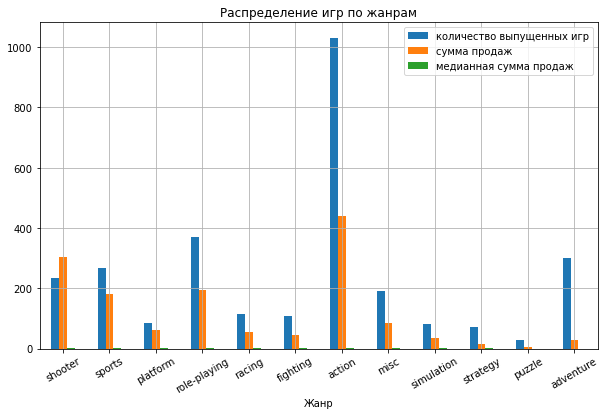

In [77]:
t.sort_values(by = 'median', ascending=False).plot(kind='bar', xlabel='Жанр',  grid=True, figsize=(10,6))
plt.title('Распределение игр по жанрам')
plt.legend(['количество выпущенных игр', 'сумма продаж','медианная сумма продаж'])
plt.xticks(rotation=30);

<div style='border:solid blue 2px; padding: 20px'>
    
<b> Вывод:</b>    
Самыми прибыльными жанрами являются: shooter, sport, platform. При этом игры в жанре shooter  выпускается не так много, но они хорошо продаются.   А самыми малоприбыльными по продажам -  adventure,puzzle,strategy,simulation. Игр в жанре action выпускается больше всех, поэтому их суммарные продажи велики. 

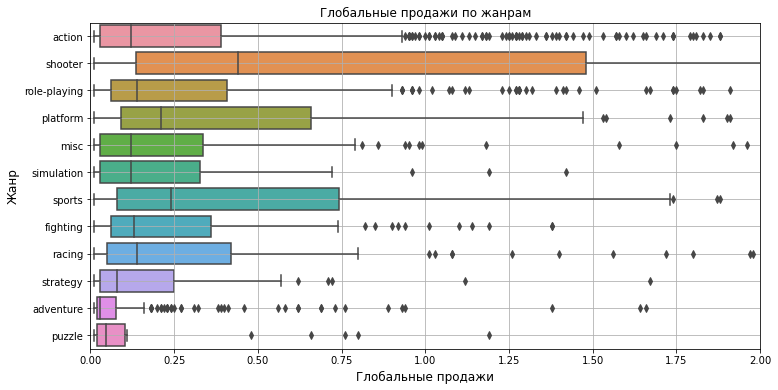

In [78]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.title('Глобальные продажи по жанрам')       
sns.boxplot(x='total_sales',
            y='genre',
            data=data_current_period
            )
plt.xlim(0,2)
plt.xlabel('Глобальные продажи', fontsize=12)
plt.ylabel('Жанр',fontsize=12)
plt.grid();  

По диаграмме размаха видно, что жанр shooter стабильно дает хорошие продажи (медиана - 0.44, больше,чем третий квартиль многих платформ), для action же видно, что медиана 0.12, много выбросов,

<div style='border:solid blue 2px; padding: 20px'>
    
<b> Общий вывод:</b>   
    
- Потенциально прибыльными на 2017 год являются платформы PS4 и XONE. 
- Оценка критиков слабо влияет на продажи игр на этих платформах (коэффициент корреляции ~ 0.4), тогда как оценка пользователей влияет очень слабо. 
- Самыми прибыльными являются жанры - shooter, sport, platform. 
    

## Составьте портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5). Опишем различия в долях продаж.
- Самые популярные жанры (топ-5). Поясним разницу.
- Определим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [79]:
#словарь регионов
dict_regions = {
    'na_sales': "Северная Америка",
    'eu_sales': 'Европа',
    'jp_sales':'Япония',
    'total_sales':'Глобал'}
#словарь колонок
dict_columns = {
    'genre': "жанр",
    'platform': 'платформ',
    'rating':'рейтинг'}

In [80]:
#список регионов
list_region = ['na_sales', 'eu_sales','jp_sales']

In [81]:
#Функция для построения графиков по медианым продажам, передаем название колонки (жанр, платформа или рейтинг)
def graffics(column_name):
    fig, ax = plt.subplots(1, len(list_region), figsize=(18,5))
    fig.suptitle(f'Медианные продажи по {dict_columns[column_name]}ам',fontsize = 16)
   # группируем по переданной колонке и считаем медианные продажи в каждом регионе (список регионов - list_region)
    for i in range(len(list_region)):
        t = data_current_period.groupby(column_name,dropna=False)[list_region[i]].median().sort_values(ascending=False).head(5)
        ax[i].set_title(f'{dict_regions[list_region[i]]}')
        sns.barplot(x=t.index, y=t.values, ax=ax[i])
        if column_name == 'rating':
            ax[i].set_xlabel(f'{dict_columns[column_name]}и')
        else:    
            ax[i].set_xlabel(f'{dict_columns[column_name]}ы')    
        
       

In [82]:
#Функция для построения графиков по суммарным продажам (доля рынка), передаем название колонки (жанр, платформа или рейтинг)
def graffics_pie(column_name):
    df = data_current_period.copy()       
# начертим круговую диаграмму для каждого региона
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'ТОП-5 по {dict_columns[column_name]}ам в регионах (Суммарные продажи)')
    for i in range(3):
  # выберем 5 самых продающихся жанров/платформ/рейтингов
        df_i = (df.groupby(column_name)[list_region[i]].sum().
             reset_index().
             sort_values(list_region[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальые  в другие и соединим с топ-5
        df_i = pd.concat([df_i,pd.DataFrame([['other',df[list_region[i]].sum() - df_i[list_region[i]].sum()]],columns=[column_name,list_region[i]])],axis=0 )
        axs[i].pie(df_i[list_region[i]], labels = df_i[column_name], autopct='%1.1f%%')
  # Зададим название региона.
        axs[i].set_title(dict_regions[list_region[i]])
    plt.show()  

Построим графики для разных регионов.
- Самые популярные платформы (топ-5). 
- Самые популярные жанры
- Влияние рейтинга на продажи

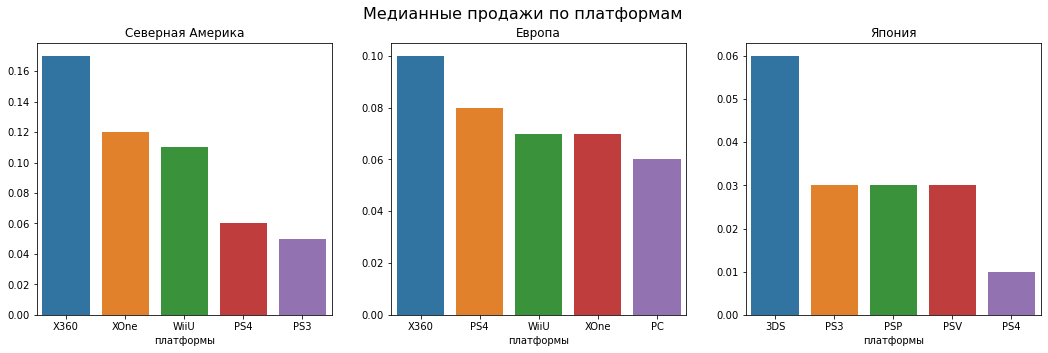

In [83]:
graffics('platform')

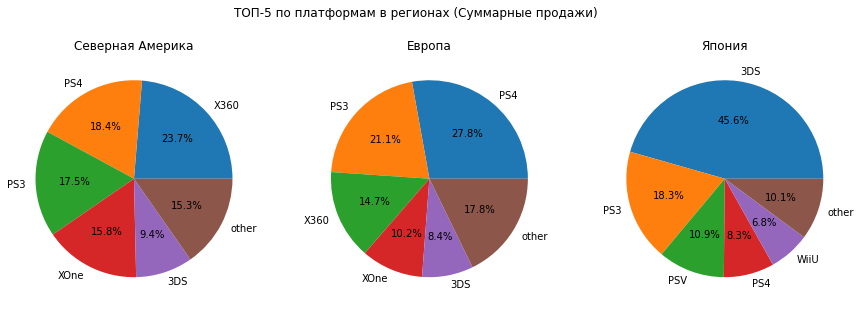

In [84]:
graffics_pie('platform')

Предпочтения по регионам в выборе платформы отличаются:
- топ-5 Северной Америки Xbox 360, Xbox One, Wii U, Play Station 4, Play Station 3. По суммарным же продажам: PS4 занимает 2 место, PS 3 - 3, Xbox One - 4, а Wii U уступила место 3DS.
- топ-5 Европы: Xbox 360, Play Station 4, Wii U, Xbox One, PC. По суммарным же продажам: PS4 занимает 1 место, PS 3 - 2,Xbox 360 -3, Xbox One - 4, а Wii U уступила место 3DS.
- топ-5 Японии: Nintendo 3DS, Play Station 3, PlayStation Portable, PlayStation Vita, Play Station 4. По суммарным продажам 
Wii U заменила в рейтинге PSP. 

Координально отличаются предпочтения японцев, так они больше выбирают портативные игровые платформы, тогда как европейцы и американцы - домашние приставки. Play Station и Nintendo выпускают японские компании, то логично, что японцы предпочитают игровые платформы "национальных" производителей. Также обычно выход игровых платформ этих производителей на рынок происходит сначала в Японии, и только через некоторое время в остальных странах. 
Xbox же наоборот производятся американской компанией и на рынок выходили сначала в Америке и Европе, а в Японии появлялись позже. 

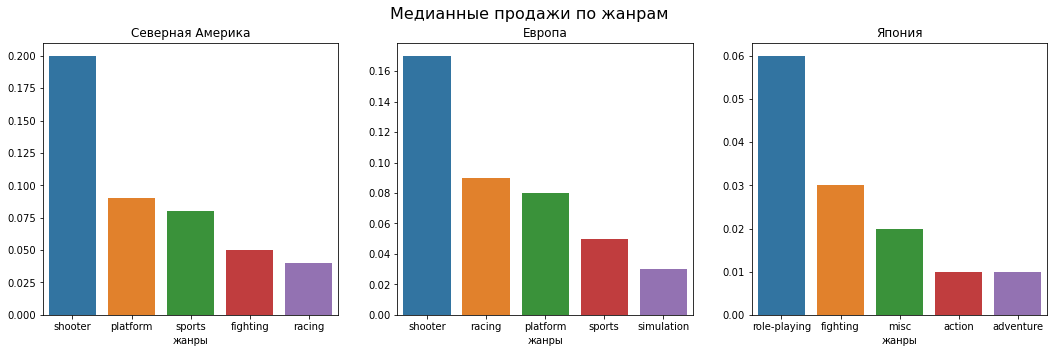

In [85]:
graffics('genre')

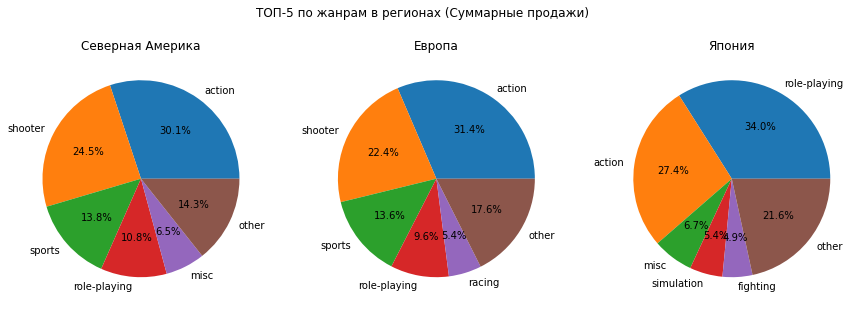

In [86]:
graffics_pie('genre')

По жанрам американцы предпочитают:shooter, platform, sports,fighting, racing, а европецы: shooter, racing, platform, sports, simulation. При этом по суммарным продажам игр в жанре action продается больше, чем shooter и в Европе, и в Америке.

Японцы же и тут отличаются, предпочитая role-playing, fighting, adventure, action и разные другие игры. В Японии игры action не смогли победить role-playing по суммарным продажам, хоть и занимают значительную долю рынка.

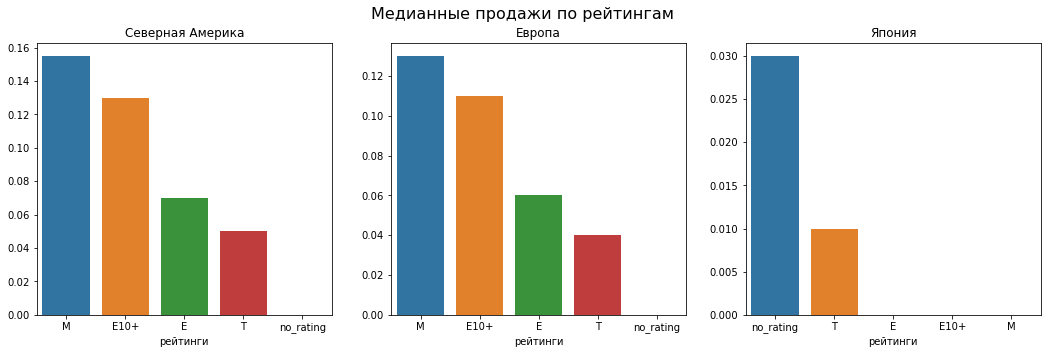

In [87]:
graffics('rating')

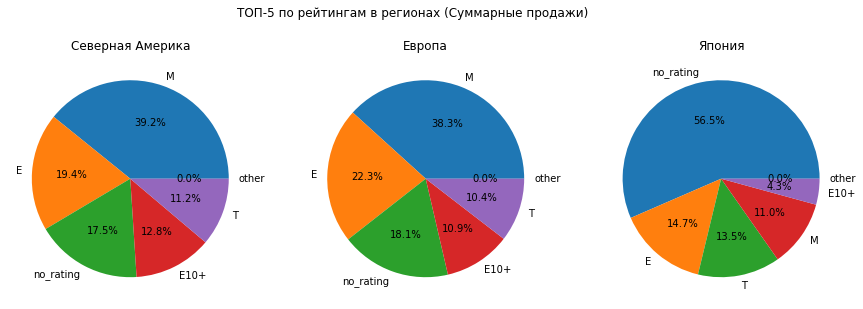

In [88]:
graffics_pie('rating')

- Американцы предпочитают игры с рейтингом 'M' ('для взрослых'), 'E10+' ('Для всех от 10 лет и старше'), E ("Для детей младшего возраста"), 'T' (Подросткам). Но по суммарным продажам игры без рейтинга продаются хорошо, что неудивительно, так как японские платформы завоевывают популярность и у американцев. По суммарным продажам 2-5 места немного поменялись: E, no-rating, E10+, T
- Предпочтения европейцев совпадают: 'M' ('для взрослых'), 'E10+' ('Для всех от 10 лет и старше'), E ("Для детей младшего возраста"), 'T' (Подросткам). По суммарным продажам также как и американцев.
- Японцы практически не обращают внимание на рейтинг (в отличие от Америки и Европы система рейтинга для производителей не является обязательной), но если рейтинг есть, то предпочитают  'T' (Подросткам), хотя по суммарным продажам после безрейтинговых игр идут игры с рейтингами: E, T, M

## Проверим гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

### Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
```
Нулевая гипотеза: Средний пользовательский рейтинг (`user_score`) платформы (`platform`)  xone  равен cреднему пользовательскому рейтингу (`user_score`) платформы (`platform`) PC`
Альтернативная гипотеза: Средний пользовательский рейтинг `(user_score`) платформы (`platform`)  XOne не равен cреднему пользовательскому рейтингу (`user_score`) платформы (`platform`)  PC`
alpha = 0.01
```
Нулевая гипотеза - двусторонняя, так как нас интересует только равно или нет. 

In [89]:
#размер выборки для Xbox One
len(data_current_period[(data_current_period['platform'] =='XOne')& (data_current_period['user_score'].notna())]['user_score'])

182

In [90]:
#размер выборки для PC
len(data_current_period[(data_current_period['platform'] =='PC')& (data_current_period['user_score'].notna())]['user_score'])

206

Так как нам необходимо проверить двустороннюю гипотезу для независимых переменных (рейтинг игры на одной платформе не влияет на рейтинг игры на другой платформе), то используем метод st.ttest_ind. Выборки разного размера, поэтому equal_var = False

In [91]:
results = st.ttest_ind(
    data_current_period[(data_current_period['platform'] =='XOne')& (data_current_period['user_score'].notna())]['user_score'],
    data_current_period[(data_current_period['platform'] =='PC')& (data_current_period['user_score'].notna())]['user_score'],
    equal_var = False)  #вызов метода для проверки гипотезы

alpha = .01  #задайте значение уровня значимости

# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.5489560454239967
Не получилось отвергнуть нулевую гипотезу


проверим, правильные ли сделаны выводы

In [92]:
print('Средний пользовательский рейтинг платформы XOne:', data_current_period[data_current_period['platform'] =='XOne']['user_score'].mean())
print('Средний пользовательский рейтинг платформы PC:', data_current_period[data_current_period['platform'] =='PC']['user_score'].mean())

Средний пользовательский рейтинг платформы XOne: 6.521427154541016
Средний пользовательский рейтинг платформы PC: 6.428643226623535


<div style='border:solid blue 2px; padding: 20px'>
    
<b> Общий вывод:</b>  
Гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC отвергнуть не получилось. 

### Проверка гипотезы: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
```
Нулевая гипотеза: Средний пользовательский рейтинг (`user_score`) жанра ('genre') action = cредний пользовательский рейтинг (`user_score`) жанра ('genre') sports`
Альтернативная гипотеза: Средний пользовательский рейтинг (`user_score`) жанра ('genre') action ≠  cредний пользовательский рейтинг (`user_score`) жанра ('genre') sports`
alpha = 0.01
```

In [93]:
#размер выборки для action
len(data_current_period[(data_current_period['genre'] =='action')& (data_current_period['user_score'].notna())]['user_score'])

523

In [94]:
#размер выборки для sports
len(data_current_period[(data_current_period['genre'] =='sports')& (data_current_period['user_score'].notna())]['user_score'])

195

Так как нам необходимо проверить двустороннюю гипотезу для независимых переменных (жанр одной игры не влияет на жанр другой), то используем метод st.ttest_ind. Выборки разного размера, поэтому equal_var = False

In [95]:
results = st.ttest_ind(
    data_current_period[(data_current_period['genre'] =='action')& (data_current_period['user_score'].notna())]['user_score'],
    data_current_period[(data_current_period['genre'] =='sports')& (data_current_period['user_score'].notna())]['user_score'],
    equal_var = False)  #вызов метода для проверки гипотезы

alpha = .01  #задайте значение уровня значимости

# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

4.2428970996510126e-20
Отвергаем нулевую гипотезу


проверим, правильные ли сделаны выводы

In [96]:
print('Средний пользовательский рейтиг жанра action:', data_current_period[data_current_period['genre'] =='action']['user_score'].mean())
print('Средний пользовательский рейтиг жанра sports:', data_current_period[data_current_period['genre'] =='sports']['user_score'].mean())

Средний пользовательский рейтиг жанра action: 6.825051307678223
Средний пользовательский рейтиг жанра sports: 5.455898284912109


<div style='border:solid blue 2px; padding: 20px'>
    
<b> Вывод:</b>  
    
Гипотезу о равенстве средних пользовательских рейтингов жанров action (англ. «действие», экшен-игры) и sports (англ. «спортивные соревнования») отвергли. Поэтому гипотеза о различии средних пользовательских рейтингов жанров action (англ. «действие», экшен-игры) и sports (англ. «спортивные соревнования») не отвергается. 

## Общий вывод

1. Выполнена предобработка данных:
    
    1.1. данные в столбцах и названия столбцов приведены к нижнему регистру     
    
    1.2. пропуски в столбце `year_of_release` - заменены заглушкой (1900)
    
    1.3. в столбце `user_score` выявлено значение 'tbd'. Значение 'tbd' заменено на пропуск ('Nan')
    
    1.4. удалены 2 строки, в которых отсутствовали и названия игр, и жанр, и рейтинг
    
    1.5. изменен тип данных:
    - `Year_of_Release` пропуски заменили на максимальный год выхода игры на другой платформе, остальные пропуски - заглушкой (1900), тип данных на int
    - `Critic_Score` — оценка критиков (максимум 100) - тип float64 поменяли на Int64
    - `User_Score` — оценка пользователей (максимум 10) - object изменили на  float.
    1.6. выявлена закономерность в пропусках данных: данные по рейтингам пользователей, критиков и ESRB отсутствуют по играм, которые не продавались в Европе и Америке.
    
    1.7. добавлен дополнительный столбец:
    - `total_sales` - глобальные продажи, млн.
2.  Изучено изменение продаж по платформам: 
    - пик выпуска игр пришелся на 2008 год. С 1990 по 2008 произошел резкий скачок в количестве выпускаемых игр. После 2008 года пошел спад выпуска игр, что связано с экономическим кризисом 2008 года и переориентированием рынка на онлайн и мобильные игры.
    - выбраны платформы с наибольшими суммарными продажами: PS2, X360, PS3, Wii, DS, PS, GBA, PS4, PSP, PC
    - изучен 'жизненный цикл' платформ:
        * платформы "живут" 10-12 лет
        * пик продаж приходится на 3-7 год от "выхода в свет"
    - выбран актуальный период для дальнейшего исследования - 2012-2016 год
    - выявлены потенциально прибыльные платформы, пик продаж которых можно ожидать в 2017 году -  PS4 и XONE
3. Изучено влияние оценок критиков и пользователей на глобальные продажи платформ.
    - между оценкой критиков и продажами пользователей имеется слабая (в диапазоне [0.3, 0.5) прямая зависимость (исключение платформы -DS, GBA, PC, Wii - для которых и влияние оценки критиков также очень слабое), тогда как между оценкой пользователей и продажами линейная связь очень слабая. Исключение - платформа - wiiu, для которой линейная взаимосвязь продаж с оценкой пользователей слабая и даже выше, чем с оценками критиков.
    * для потенциально прибыльных платформ PS4 и XOne зависимость продаж от оценки критиков слабая (~0.4)
4. Составлено распределение игр за актуальный период:
    - Самыми прибыльными являются жанры - shooter, sport, platform. 
5. Составлен портрет пользователей из разных регионов:
     - Северная Америка: 
         * топ-5 платформ: Xbox 360, Xbox One, Wii U, Play Station 4, Play Station 3
         * топ-5 жанров: shooter,platform, racing, sports, figthing
         * предпочитают игры с рейтингом 'M' ('для взрослых'), 'E10+' ('Для всех от 10 лет и старше'), E ("Для детей младшего возраста"), 'T' (Подросткам)
     - Европа:
         * топ-5 платформ: Xbox 360, Play Station 4,  Wii U, Xbox One, PC
         * топ-5 жанров: shooter,racing, platform,  sports, simulation
         * по рейтингу европейцы солидарны с американцами: 'M' ('для взрослых'), 'E10+' ('Для всех от 10 лет и старше'), E ("Для детей младшего возраста"), 'T' (Подросткам)
     - Япония:
         * топ-5 платформ: Nintendo 3DS, Play Station 3, PlayStation Portable, PlayStation Vita, Play Station 4
         * role-playing, fighting, adventure, action и разные другие игры
         * японцы на рейтинг критиков практически не обращают внимания (так как он необязателен для продажи игры в регионе),но предпочитают 'T' (Подросткам).
    
6. Проверены гипотезы:
    - Гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC отвергнуть не получилось.
    - Гипотезу о различии средних пользовательских рейтингов жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») отвергнуть не получилось. 

Выбор платформы и жанра игры для продажи в 2017 году зависит от региона предполагаемых продаж. Так в Америке и Европе из выбранных перспективных платформ лучше будет продаваться XONE и жанры shooter, sport, platform, японцы же предпочтут PS4 и жанр role-playing. 
